##### _Data Visualization with Python_
---

# Pivot Chart

A pivot chart is a data visualization that is *dynamically linked* to a pivot table.  A pivot table is a data summarization tool that aggregates and reorganizes data from a larger table (or DataFrame in Pandas).  The pivot chart then visualizes the summarized data from the pivot table, typically using a standard chart type like a bar chart, line chart, or pie chart. The key advantage of a pivot chart is its interactivity and flexibility: changing the structure of the underlying pivot table automatically updates the chart.

### Suitable Variable Types

The variable types used in a pivot chart depend on the underlying data and how it's summarized in the pivot table. However, generally:

*   **Original Data:** Can include numerical (interval/ratio) and categorical (nominal/ordinal) variables.
*   **Pivot Table:**
    *   **Rows/Columns:** Typically categorical variables (used for grouping).
    *   **Values:**  Typically a numerical variable that is aggregated (summed, averaged, counted, etc.).
*   **Chart:** The chart type itself will have its own variable type requirements (e.g., a bar chart based on a pivot table will typically have categories on the x-axis and aggregated numerical values on the y-axis).

### Use Cases

1.  **Dynamic Data Exploration:** Pivot charts allow you to quickly explore different views of your data by changing the row/column groupings and the aggregation function in the pivot table. The chart updates automatically, providing immediate visual feedback.
2.  **Comparing Aggregated Values:**  Commonly used to compare aggregated values (sums, averages, counts, etc.) across different categories and subcategories.
3.  **Identifying Trends and Patterns:**  By changing the pivot table structure, you can uncover trends and patterns that might not be apparent in the raw data.
4.  **Creating Interactive Dashboards:**  Pivot charts are often used in interactive dashboards to allow users to drill down into the data and explore different perspectives.
5. **Summarizing large data sets:**

### Potential Pitfalls

1.  **Overly Complex Pivot Tables:**  If the underlying pivot table is too complex (too many rows/columns), the resulting chart can be difficult to interpret.  It's important to keep the pivot table structure focused on the key comparisons you want to make.
2.  **Incorrect Aggregation:**  Choosing the wrong aggregation function (e.g., summing a variable that should be averaged) can lead to misleading results.
3.  **Misinterpreting Proportions (with Pie/Stacked Charts):** If you use a pie chart or stacked bar chart as the pivot chart visualization, be aware of the usual pitfalls of those chart types (difficulty comparing slices/segments).
4.  **Ignoring Underlying Data:**  A pivot chart is a *summary* visualization. It's important to remember that it's based on aggregated data, and you might be losing detail from the original data.  Always consider whether the aggregation is appropriate for the question you're trying to answer.
5. **Dependence on Pivot Table Software:** The specific features and interactivity of pivot charts can vary depending on the software being used (Excel, Pandas, specialized BI tools).

### How to Create Pivot Charts?

#### Creating a Dummy Database:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Synthetic Data: Sales Data ---
np.random.seed(42)
n = 100  # Number of sales records

regions = ['North', 'South', 'East', 'West']
products = ['Electronics', 'Clothing', 'Books', 'Home Goods']
salespeople = ['Alice', 'Bob', 'Charlie', 'David']

data = {
    'Region': np.random.choice(regions, size=n),
    'Product': np.random.choice(products, size=n),
    'Salesperson': np.random.choice(salespeople, size=n),
    'Date': pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'SalesAmount': np.random.randint(50, 501, size=n)  # Sales amounts between 50 and 500
}

df_sales = pd.DataFrame(data)
df_sales.head()

,Region,Product,Salesperson,Date,SalesAmount
0,East,Books,Charlie,2023-01-01,274
1,West,Clothing,David,2023-01-02,434
2,North,Clothing,Charlie,2023-01-03,452
3,East,Home Goods,Alice,2023-01-04,175
4,East,Clothing,David,2023-01-05,179


#### Pivot Charts with Matplotlib:

Pivot Table 1 (Total Sales by Region):
         SalesAmount
Region             
East           7472
North          6083
South          7331
West           7815


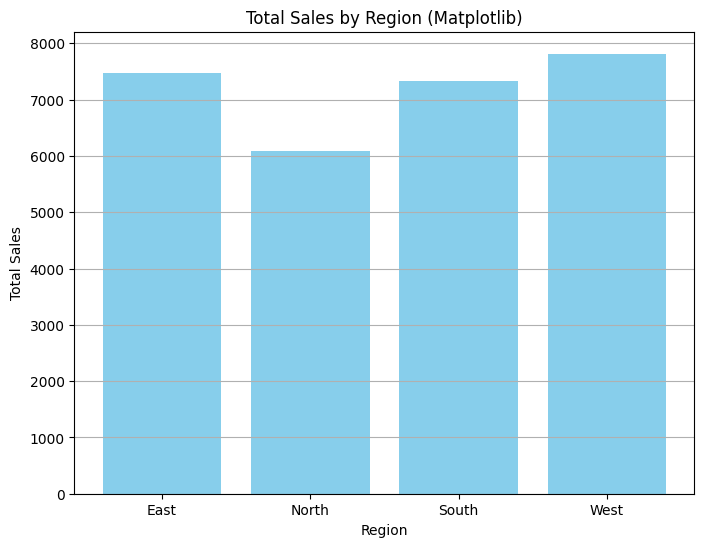


Pivot Table 2 (Average Sales by Product and Region):
 Product       Books  Clothing  Electronics  Home Goods
Region                                                
East     254.400000   317.750   320.090909  352.000000
North    347.000000   331.500   324.750000  246.142857
South    296.800000   264.375   306.714286  264.166667
West     245.066667   369.000   273.750000  224.000000


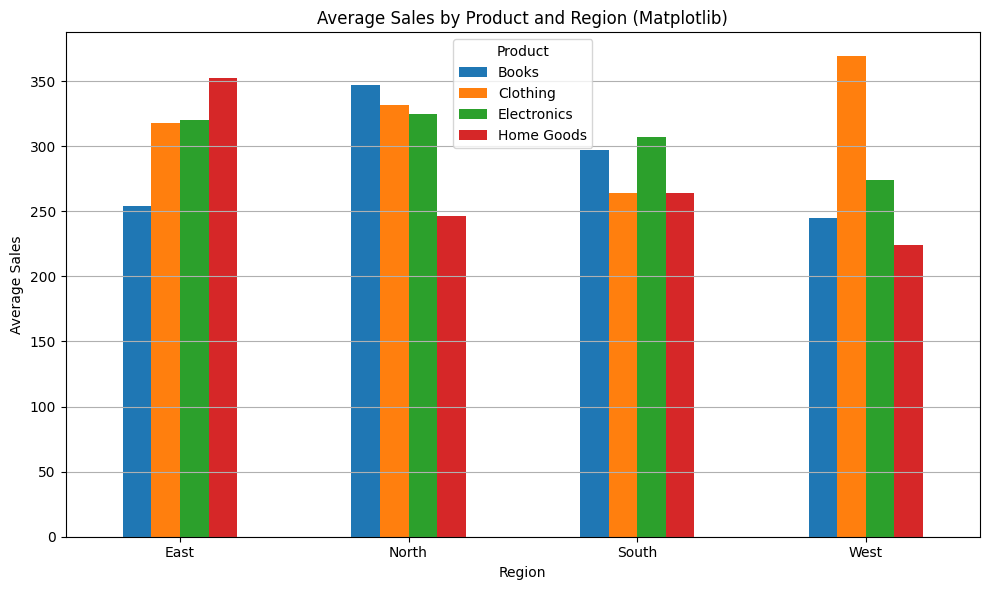


Pivot Table 3 (Total Sales by Salesperson per Month):
 Month           1     2     3    4
Salesperson                       
Alice        2265  2374  2161  781
Bob          1687  1724  1883  818
Charlie      3273  2520  1597  630
David        1724  3035  1724  505


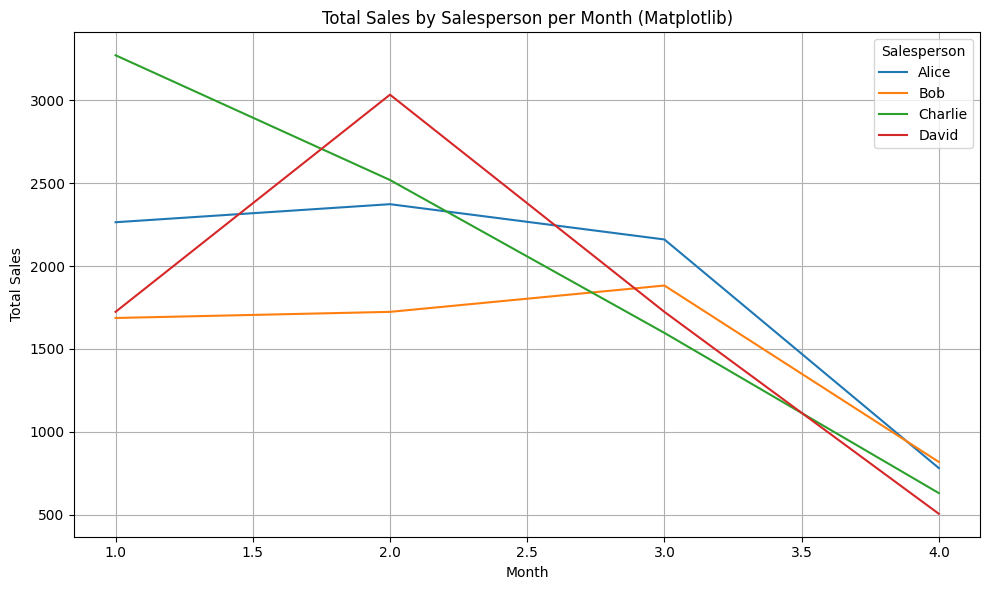

In [4]:
# --- Pivot Table 1: Total Sales by Region ---
pivot_table_region = pd.pivot_table(df_sales, values='SalesAmount', index='Region', aggfunc='sum') # Changed to 'sum'
print("Pivot Table 1 (Total Sales by Region):\n", pivot_table_region)

# Matplotlib Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(x=pivot_table_region.index, height=pivot_table_region['SalesAmount'], color='skyblue')
plt.title('Total Sales by Region (Matplotlib)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

# --- Pivot Table 2: Average Sales by Product and Region ---
pivot_table_product_region = pd.pivot_table(df_sales, values='SalesAmount', index='Region', columns='Product', aggfunc='mean') # Changed to 'mean'
print("\nPivot Table 2 (Average Sales by Product and Region):\n", pivot_table_product_region)

# Matplotlib Grouped Bar Chart
pivot_table_product_region.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales by Product and Region (Matplotlib)')
plt.xlabel('Region')
plt.ylabel('Average Sales')
plt.grid(axis='y')
plt.xticks(rotation=0)  # Keep region labels horizontal
plt.legend(title='Product')
plt.tight_layout()
plt.show()

# --- Pivot Table 3: Total sales by Salesperson per Month---
df_sales['Month'] = df_sales['Date'].dt.month # Extracting month
pivot_table_salesperson_month = pd.pivot_table(df_sales, values='SalesAmount', index='Salesperson', columns='Month', aggfunc='sum') # Changed to 'sum'
print("\nPivot Table 3 (Total Sales by Salesperson per Month):\n", pivot_table_salesperson_month)

# Matplotlip Line Chart
pivot_table_salesperson_month.T.plot(kind = "line", figsize=(10, 6)) # Transpose
plt.title('Total Sales by Salesperson per Month (Matplotlib)')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Pivot Charts with Seaborn:

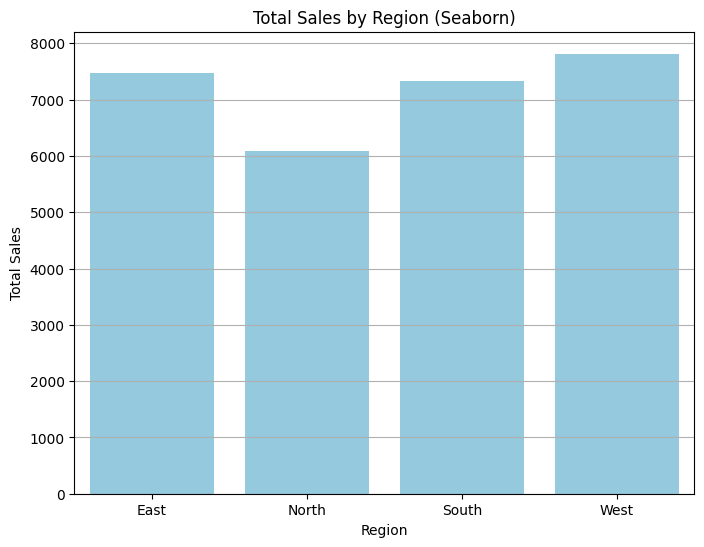

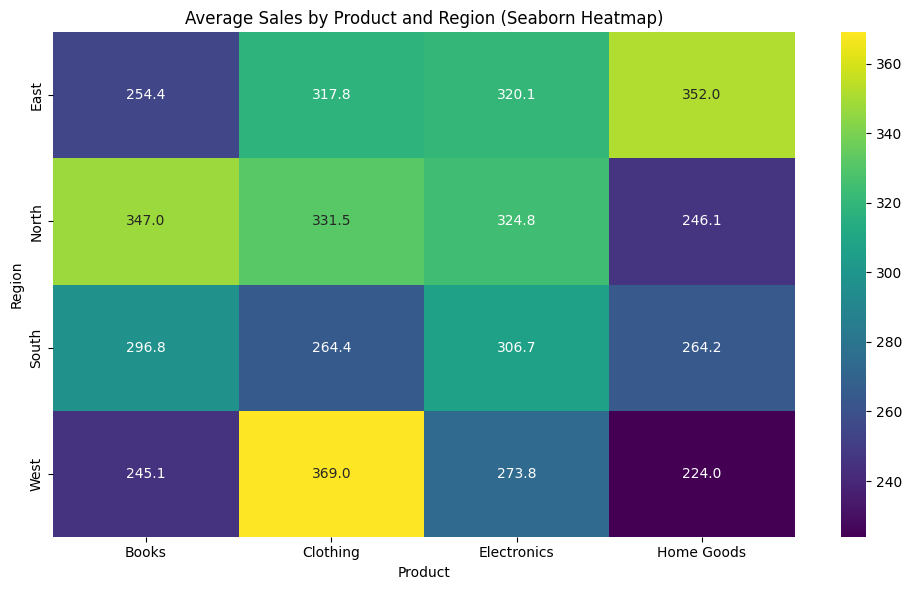

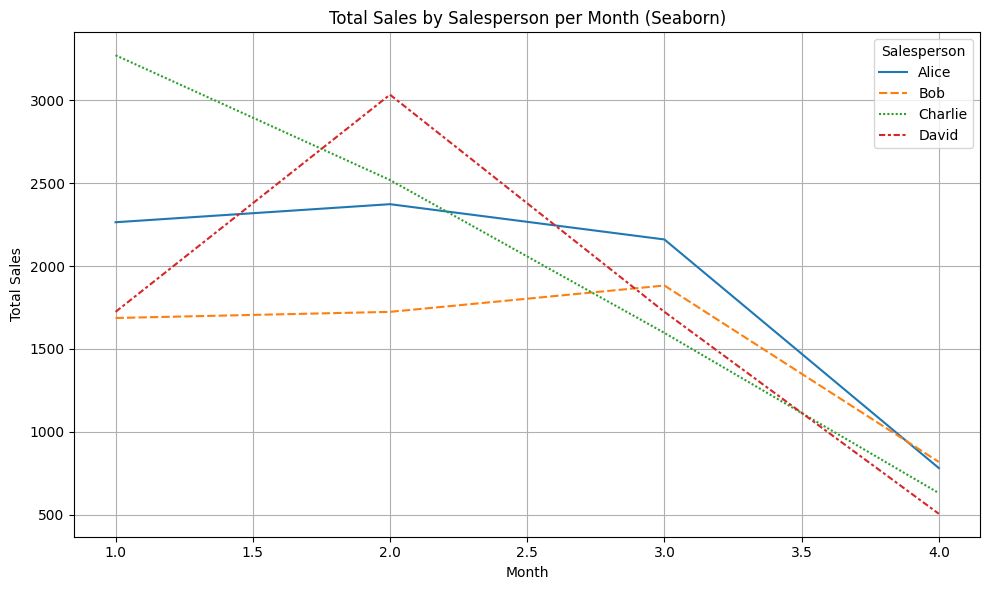

In [3]:
# --- Seaborn Bar Chart (using Pivot Table 1) ---
plt.figure(figsize=(8, 6))
sns.barplot(x=pivot_table_region.index, y='SalesAmount', data=pivot_table_region.reset_index(), color='skyblue')
plt.title('Total Sales by Region (Seaborn)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

# --- Seaborn Heatmap (using Pivot Table 2) ---
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_product_region, annot=True, fmt=".1f", cmap='viridis')
plt.title('Average Sales by Product and Region (Seaborn Heatmap)')
plt.xlabel('Product')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# --- Seaborn Line Chart (Using Pivot Table 3)
plt.figure(figsize=(10,6))
sns.lineplot(data = pivot_table_salesperson_month.T)
plt.title('Total Sales by Salesperson per Month (Seaborn)')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()